In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
ap=pd.read_csv('Advertising.csv')
ap

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
ap.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
ap.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
ap.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


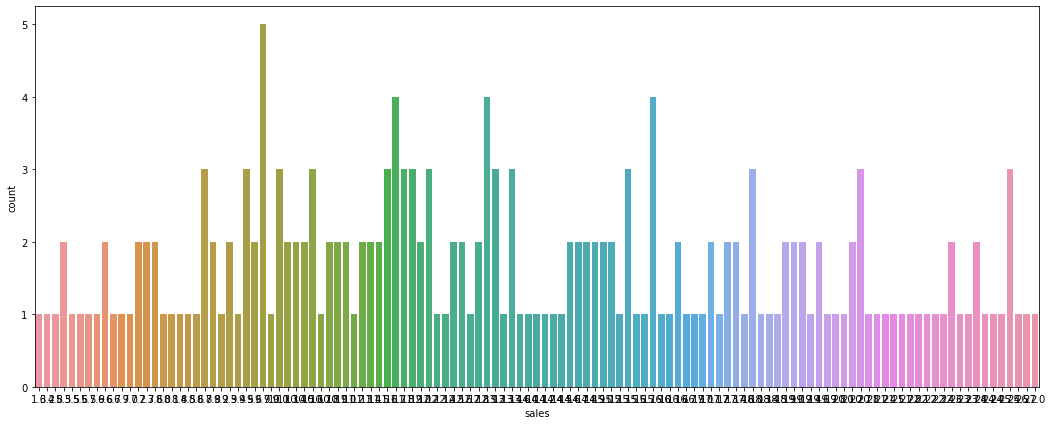

In [7]:
plt.figure(figsize=(18,7))
sns.countplot(ap['sales'])

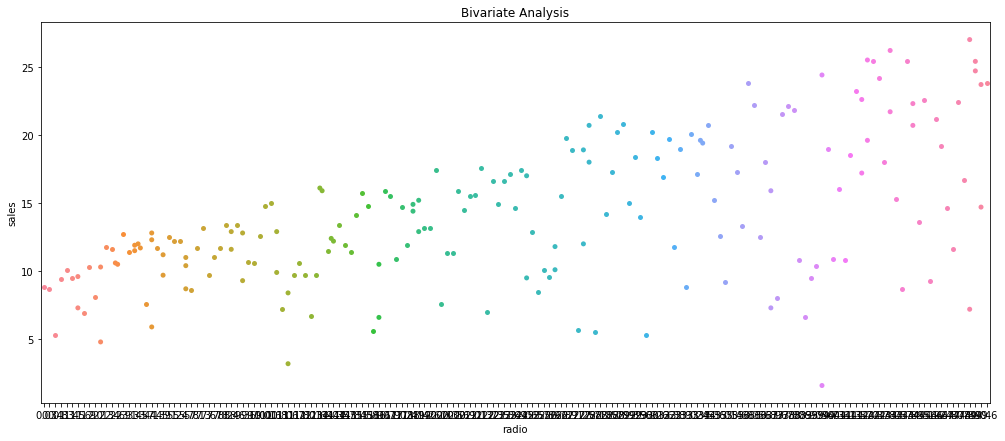

In [8]:
plt.figure(figsize=(17,7))
sns.swarmplot(x='radio',y='sales',data=ap)
plt.title('Bivariate Analysis')
plt.show()

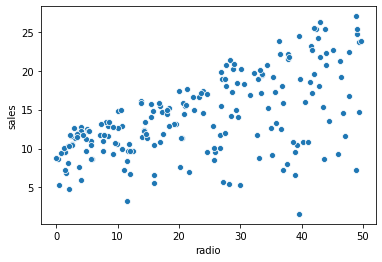

In [9]:
sns.scatterplot(x='radio',y='sales',data=ap)

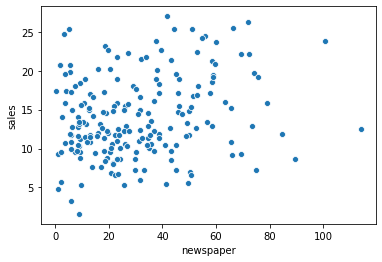

In [10]:
sns.scatterplot(x='newspaper',y='sales',data=ap)

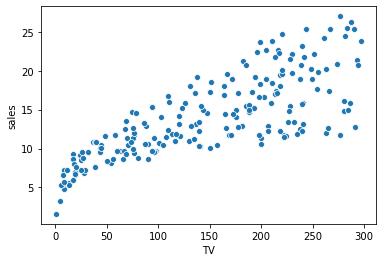

In [11]:
sns.scatterplot(x='TV',y='sales',data=ap)

In [12]:
ap.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


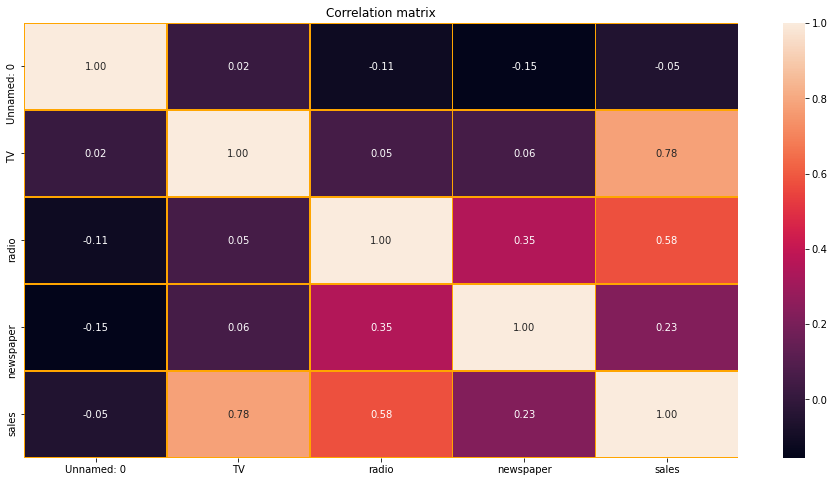

In [13]:
corr=ap.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

In [14]:
ap.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


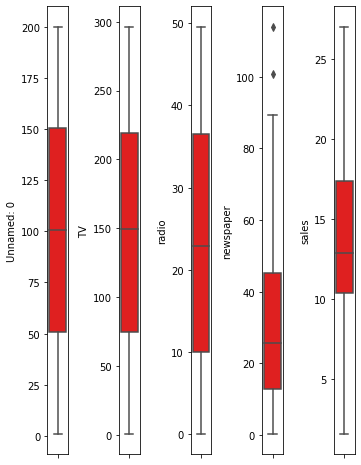

In [15]:
collist=ap.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ap[collist[i]],color='red',orient='v')
    plt.tight_layout()

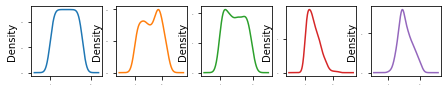

In [16]:
ap.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

In [17]:
ap.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

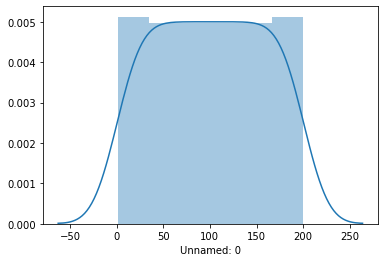

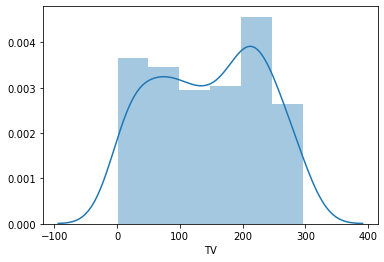

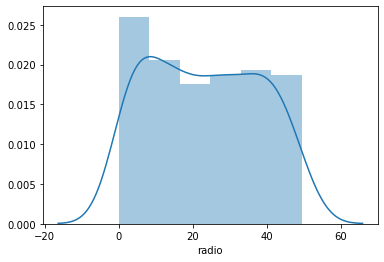

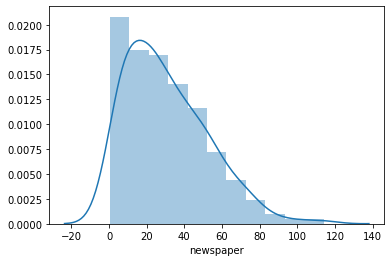

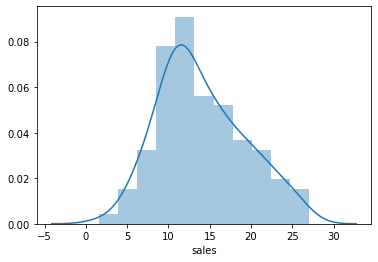

In [18]:
for m in ap.columns:
    plt.figure()
    sns.distplot(ap[m])

In [19]:
cor=ap.corr()
cor['sales'].sort_values(ascending=True)

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

In [20]:
ap.sales.value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

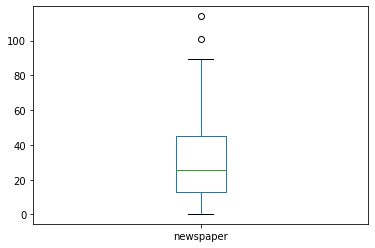

In [21]:
ap['newspaper'].plot.box()

In [22]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ap))
z.shape

(200, 5)

In [23]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [24]:
z[101][3]

3.238153957342154

In [25]:
z[16][3]

3.8411707150992718

In [26]:
ap_new=ap[(z<3).all(axis=1)]
print(ap.shape)
print(ap_new.shape)

(200, 5)
(198, 5)


In [27]:
from sklearn.preprocessing import power_transform
ap_new=power_transform(ap_new,method='yeo-johnson')
ap_new

array([[-2.08112123e+00,  9.55983058e-01,  9.69109801e-01,
         1.60419650e+00,  1.47666436e+00],
       [-2.03541299e+00, -1.19200349e+00,  1.04623436e+00,
         8.31044006e-01, -6.45180303e-01],
       [-1.99380721e+00, -1.64612530e+00,  1.37296802e+00,
         1.60705249e+00, -8.89458475e-01],
       [-1.95500804e+00,  1.42934281e-01,  1.14733160e+00,
         1.28376774e+00,  8.92430740e-01],
       [-1.91830818e+00,  4.56452411e-01, -7.35026416e-01,
         1.28062154e+00, -1.27879223e-01],
       [-1.88326684e+00, -1.82040080e+00,  1.51543955e+00,
         1.76610727e+00, -1.39237187e+00],
       [-1.84958541e+00, -1.00349358e+00,  7.03096422e-01,
        -1.02053455e-01, -3.49648853e-01],
       [-1.81704952e+00, -2.09960489e-01, -8.76566044e-02,
        -8.49688954e-01, -6.88298190e-02],
       [-1.78549851e+00, -1.82264543e+00, -1.62948287e+00,
        -2.09866461e+00, -2.04804420e+00],
       [-1.75480800e+00,  6.52694004e-01, -1.56152179e+00,
        -2.26499330e-01

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ap_new=sc.fit_transform(ap_new)
ap_new

array([[-2.08112123e+00,  9.55983058e-01,  9.69109801e-01,
         1.60419650e+00,  1.47666436e+00],
       [-2.03541299e+00, -1.19200349e+00,  1.04623436e+00,
         8.31044006e-01, -6.45180303e-01],
       [-1.99380721e+00, -1.64612530e+00,  1.37296802e+00,
         1.60705249e+00, -8.89458475e-01],
       [-1.95500804e+00,  1.42934281e-01,  1.14733160e+00,
         1.28376774e+00,  8.92430740e-01],
       [-1.91830818e+00,  4.56452411e-01, -7.35026416e-01,
         1.28062154e+00, -1.27879223e-01],
       [-1.88326684e+00, -1.82040080e+00,  1.51543955e+00,
         1.76610727e+00, -1.39237187e+00],
       [-1.84958541e+00, -1.00349358e+00,  7.03096422e-01,
        -1.02053455e-01, -3.49648853e-01],
       [-1.81704952e+00, -2.09960489e-01, -8.76566044e-02,
        -8.49688954e-01, -6.88298190e-02],
       [-1.78549851e+00, -1.82264543e+00, -1.62948287e+00,
        -2.09866461e+00, -2.04804420e+00],
       [-1.75480800e+00,  6.52694004e-01, -1.56152179e+00,
        -2.26499330e-01

In [29]:
ap=pd.DataFrame(ap_new)
ap

,0,1,2,3,4
0,-2.081121,0.955983,0.969110,1.604196,1.476664
1,-2.035413,-1.192003,1.046234,0.831044,-0.645180
2,-1.993807,-1.646125,1.372968,1.607052,-0.889458
3,-1.955008,0.142934,1.147332,1.283768,0.892431
4,-1.918308,0.456452,-0.735026,1.280622,-0.127879
...,...,...,...,...,...
193,1.502422,-1.288311,-1.423941,-0.687435,-1.292322
194,1.516075,-0.521579,-1.287689,-1.146090,-0.799286
195,1.529708,0.416577,-0.862474,-1.314437,-0.147694
196,1.543323,1.467535,1.182269,1.517395,1.990554


In [30]:
x=ap.iloc[:,:-1]
y=ap.iloc[:,-1]

In [31]:
x.shape

(198, 4)

In [32]:
y.shape

(198,)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    acc=r2_score(y_test,predlg)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9203590499940473 on Random_state  1
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_state  9
Best Accuracy is  0.9326879031769484 on Random_s

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=35)

In [35]:
lg=LinearRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)

In [36]:
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,predlg))
print('mean squared error :-',mean_squared_error(y_test,predlg))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,predlg)))

Error :-
mean absolute error :- 0.19172152051203534
mean squared error :- 0.058810613298143376
root mean squared error :- 0.24250899632414336


In [37]:
print('r2_score value :-',r2_score(y_test,predlg))

r2_score value :- 0.9398414311002885


In [38]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.8958433989782135


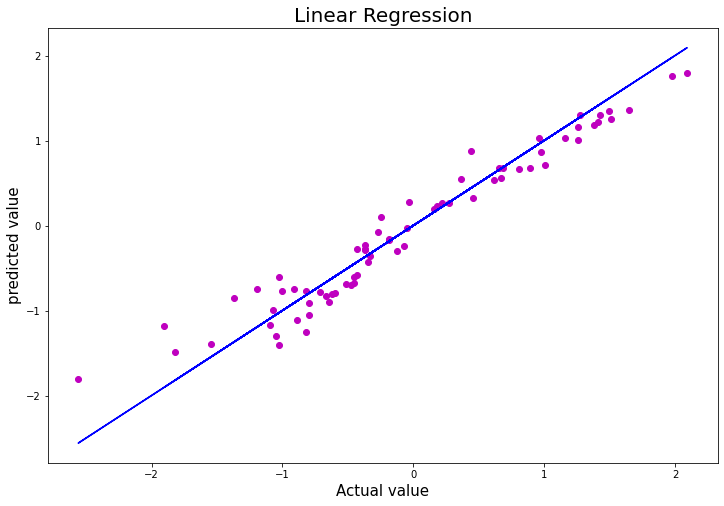

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=predlg,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [41]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
lo=Lasso()
gs=GridSearchCV(lo,parameters)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'alpha': 0.01, 'random_state': 1}


In [42]:
lo=Lasso(alpha=0.0001,random_state=1)
lo.fit(x_train,y_train)
predlo=lo.predict(x_test)
r2=r2_score(y_test,predlo)

cv_score=cross_val_score(lo,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.9398354217267733
0.8958742428290207


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)

cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()

print(r2)
print(cv_mean)

0.9716297032706586
0.9648083007011603


In [44]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)

cv_score=cross_val_score(ad,x,y,cv=5)
cv_mean=cv_score.mean()

print(r2)
print(cv_mean)

0.9505862024170688
0.9443057786006062


In [45]:
import joblib
joblib.dump(rf,'advertising_model.obj')

['advertising_model.obj']